In [1]:
"""
Uses a dataset to do train/test but uses ANOTHER dataset as test.

test_size=0.1 (same model metrics as for 0.15)so that train size is a large as possible as this is a routine that does not load in an existing model...TO DO.

model gives 0.88 accuracy.


"""

'\nUses a dataset to do train/test but uses ANOTHER dataset as test.\n\ntest_size=0.1 (same model metrics as for 0.15)so that train size is a large as possible as this is a routine that does not load in an existing model...TO DO.\n\nmodel gives 0.88 accuracy.\n\n\n'

In [2]:

import random
from datetime import datetime
import uuid
from csv import writer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from utils.logging.log_to_csv import save_results

In [3]:
lst_split = [0.3,0.25,0.2,0.15,0.1,0.05]
SPLIT = lst_split[random.randint(0,len(lst_split)-1)]
# SPLIT = 0.15
SPLIT


0.25

In [4]:
if random.randint(1,100) > 50:
  DO_SCALING = True
else:
  DO_SCALING = False

# DO_SCALING = False
DO_SCALING

False

In [5]:
x=  random.randint(1,300) 
if x < 100:
  MODEL_TYPE = 'log'
elif x < 200:
  MODEL_TYPE = 'ran'
else:
  MODEL_TYPE = 'ada'

# MODEL_TYPE = 'ada'

MODEL_TYPE

'ada'

In [6]:
RND_NUM = random.randint(1,1000)
# RND_NUM = random.randint(1120,1140)

RND_NUM

767

In [7]:
lst_datasets = [   

'./datasets/reduced_features_mlr_datasets/RED_ADA_RANKED_101.csv',

'./datasets/mlr_spearman.csv',  
]
len(lst_datasets)

2

In [8]:
DATASET = lst_datasets[random.randint(0,len(lst_datasets)-1)]
DATASET

'./datasets/reduced_features_mlr_datasets/RED_ADA_RANKED_101.csv'

In [9]:
df = pd.read_csv(DATASET)

In [10]:
df.head()

,CCKBR,HECW2,DTNA,FLJ31813,TCF21,DOCK5,CLEC5A,ZFP92,IGHMBP2,TPRN,...,ANGPTL3,FLJ30679,C9orf78,KLHL22,ZSCAN4,GREM2,MREG,GRIK3,ALAS1,target
0,0.158283,0.994869,3.441078,0.274479,0.498505,0.611998,0.027605,0.377817,3.481932,2.352315,...,0.023631,0.075259,4.544430,3.995702,0.044206,0.730560,2.226669,0.308878,3.447385,True
1,0.000000,0.875277,3.872691,0.317838,0.351506,0.277717,0.223924,0.573368,2.951877,3.100552,...,0.027392,0.087020,4.410836,4.115491,0.076096,0.344939,1.810657,0.831351,3.800983,False
2,0.000000,0.965042,3.716804,0.238793,0.243135,1.297250,0.095969,0.571954,3.082246,2.546811,...,0.024023,0.125302,4.121438,4.024346,0.088520,0.932035,1.726334,0.564331,3.884686,False
3,2.435231,1.446828,3.657686,0.290302,1.476848,0.760897,0.144089,0.848737,2.917837,2.568081,...,0.134915,0.234647,4.323276,4.248239,0.086185,0.317690,1.788159,0.663855,4.212546,False
4,0.244065,1.509316,2.729762,0.343609,0.000000,0.825248,0.060697,0.678269,2.918732,2.554471,...,0.026270,0.056205,4.298790,3.928304,0.000000,0.192882,1.487944,0.167089,4.041287,True


<AxesSubplot: xlabel='target', ylabel='count'>

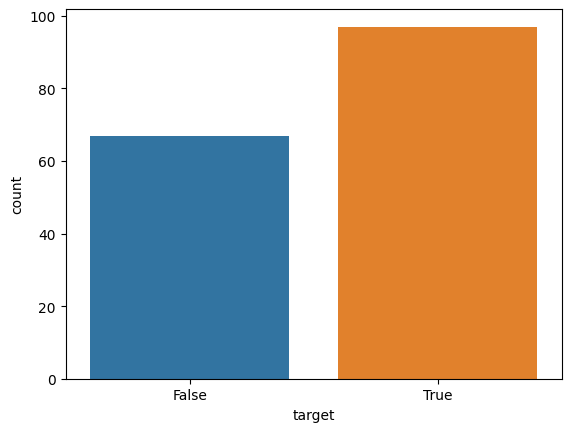

In [11]:
sns.countplot(data=df,x='target')

MODEL

In [12]:
# Model evaluation
X = df.drop('target',axis=1)
y = df['target']
X.shape

(164, 46)

In [13]:
#  if using mlr_ada_best.csv which has 48 non-zero feature importances from ADA best set of hyperparameters: AdaBoostClassifier(algorithm='SAMME.R', base_estimator='deprecated', learning_rate=1.0,n_estimators=50, random_state=1113)

# START = 0
# END = 47
# # Select first N columns
# X  = X.iloc[: , START:END]

In [14]:
X

,CCKBR,HECW2,DTNA,FLJ31813,TCF21,DOCK5,CLEC5A,ZFP92,IGHMBP2,TPRN,...,RTN4R,ANGPTL3,FLJ30679,C9orf78,KLHL22,ZSCAN4,GREM2,MREG,GRIK3,ALAS1
0,0.158283,0.994869,3.441078,0.274479,0.498505,0.611998,0.027605,0.377817,3.481932,2.352315,...,3.421880,0.023631,0.075259,4.544430,3.995702,0.044206,0.730560,2.226669,0.308878,3.447385
1,0.000000,0.875277,3.872691,0.317838,0.351506,0.277717,0.223924,0.573368,2.951877,3.100552,...,2.432361,0.027392,0.087020,4.410836,4.115491,0.076096,0.344939,1.810657,0.831351,3.800983
2,0.000000,0.965042,3.716804,0.238793,0.243135,1.297250,0.095969,0.571954,3.082246,2.546811,...,2.738078,0.024023,0.125302,4.121438,4.024346,0.088520,0.932035,1.726334,0.564331,3.884686
3,2.435231,1.446828,3.657686,0.290302,1.476848,0.760897,0.144089,0.848737,2.917837,2.568081,...,2.638841,0.134915,0.234647,4.323276,4.248239,0.086185,0.317690,1.788159,0.663855,4.212546
4,0.244065,1.509316,2.729762,0.343609,0.000000,0.825248,0.060697,0.678269,2.918732,2.554471,...,3.016660,0.026270,0.056205,4.298790,3.928304,0.000000,0.192882,1.487944,0.167089,4.041287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,0.000000,2.299547,4.108474,0.412667,0.636233,0.663691,0.110019,0.867078,2.852736,2.307644,...,2.365735,0.063860,0.034877,3.786889,4.169476,0.030424,0.247059,2.182572,2.924818,3.018453
160,0.000000,1.164658,3.868262,0.232327,0.287322,1.112380,0.033070,0.555272,2.683218,2.636116,...,2.384614,0.028364,0.030643,3.747785,3.772477,0.000000,0.145492,1.644549,2.090308,3.619941
161,0.000000,1.954617,2.917128,0.403402,0.522945,1.357456,1.869785,0.716682,2.529179,2.615367,...,3.328801,0.000000,0.036413,4.243730,4.146223,0.000000,0.186625,2.433833,3.626591,4.633565
162,0.030370,0.841038,5.043178,0.390015,0.178927,0.356804,0.000000,0.106801,3.839093,2.761338,...,2.378220,0.000000,0.000000,4.479075,3.855591,0.000000,0.155274,1.705726,0.045522,4.623615


In [15]:
#  Model
# RND_NUM = 101
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=SPLIT, random_state=RND_NUM)
# try random_state=3 original is 101

In [16]:
if DO_SCALING:
    try:
        scaler = StandardScaler()
        # scaling does not seem to affect results
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
    except:
        print('SCALING FAIL')

In [17]:
# 1113

if MODEL_TYPE == 'ada':
  model = AdaBoostClassifier(algorithm='SAMME.R', learning_rate=1.0,n_estimators=50, random_state=1113)

In [18]:
if MODEL_TYPE == 'log':
    model = LogisticRegression(max_iter=1000)

In [19]:
if MODEL_TYPE == 'ran':
    model = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=4098, verbose=0, warm_start=False)


In [20]:
model.fit(X_train,y_train)

AdaBoostClassifier(random_state=1113)

In [21]:
predictions = model.predict(X_test)

In [22]:
predictions

array([False,  True, False,  True,  True, False, False, False,  True,
       False, False,  True,  True,  True, False,  True, False, False,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True, False,  True,
        True,  True, False, False,  True])

In [23]:
df_predictions =  pd.DataFrame(predictions)
df_predictions.rename({0:'pred'}, axis=1, inplace=True)
# df_predictions

In [24]:
df_y_test = pd.DataFrame(y_test)
df_y_test.rename({'target':'actual'}, axis=1, inplace=True)
# df_y_test

In [25]:

# Combine two df with different inexes
df_preds=pd.concat([df_y_test,df_predictions],axis=0)
df_preds
df_results= pd.concat([df_y_test.reset_index(drop=True), df_predictions.reset_index(drop=True)], axis=1)
df_results['correct'] = df_results['actual'] == df_results['pred']
holdout_correct = df_results['correct'].sum()/len(df_results)
df_results['correct'] = df_results['correct'].replace({True: 'YES', False: 'NO'})
df_results


,actual,pred,correct
0,True,False,NO
1,True,True,YES
2,True,False,NO
3,True,True,YES
4,True,True,YES
5,False,False,YES
6,True,False,NO
7,False,False,YES
8,False,True,NO
9,False,False,YES


In [26]:
holdout_correct = round(holdout_correct,2)
holdout_correct

0.78

Evaluate MODEL

In [27]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

       False       0.80      0.67      0.73        18
        True       0.77      0.87      0.82        23

    accuracy                           0.78        41
   macro avg       0.78      0.77      0.77        41
weighted avg       0.78      0.78      0.78        41



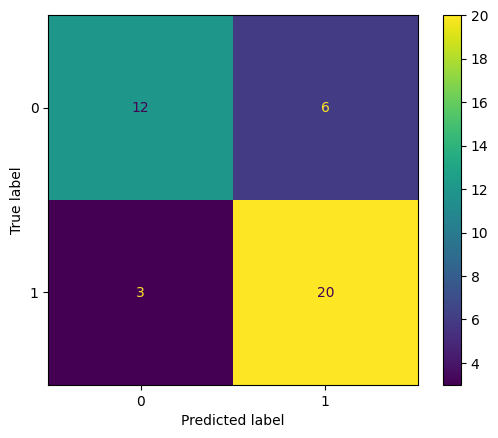

In [28]:
cm = confusion_matrix(y_test, predictions, )
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [29]:
#  LOG DATA 

timestamp = datetime.now()
FILE ='./test_results_loop.csv'

RUN_ID = str(uuid.uuid4())

DATA = [RUN_ID, timestamp, DATASET, MODEL_TYPE,
        SPLIT, DO_SCALING, RND_NUM, holdout_correct]

save_results(FILE, DATA)


end csv logger function save_results()
